## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [4]:
import numpy as np ; import  matplotlib.pyplot as plt

#### Read RegData csv file into numpy array 

In [5]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [6]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [7]:
x = np.array(data[:,0])
y = np.array(data[:,1])


#### Explore your data

In [8]:
x

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [9]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

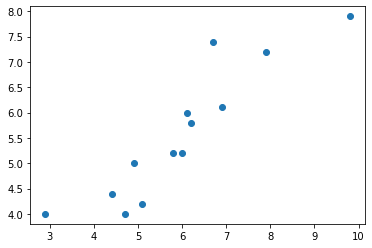

In [10]:
plt.scatter(x,y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [11]:
theta_0 = 0
theta_1 = 0
learning_rate = 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [12]:
h_x = theta_0 + theta_1 * x
h_x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [13]:
error_vector = h_x-y
print(error_vector)
j = np.dot(error_vector,error_vector)/(2*len(y))
print(j)


[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
16.305384479692318


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [14]:
d_theta_0 = np.sum(error_vector)/len(y)
d_theta_1 = np.sum(error_vector*x)/len(y)
print(d_theta_0)
print(d_theta_1)
gradient_vector = np.array([ [d_theta_0],[d_theta_1] ])
print(gradient_vector)


-5.56923073976923
-35.043846043215375
[[ -5.56923074]
 [-35.04384604]]


### Step5: Update the parameters (simultaneously).

In [15]:
theta_0_new = theta_0 - learning_rate*d_theta_0
theta_1_new = theta_1 - learning_rate*d_theta_1
print(theta_0_new)
print(theta_1_new)

0.0005569230739769231
0.003504384604321538


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [16]:
max_iterations = 1000
iteration = 0
iteration_arr = []
theta_0 = 0
theta_1 = 0
learning_rate = 0.01
j = []
while (len(j)<2) or (iteration < max_iterations and j[-2]-j[-1] > 0.0001) :
  h_x = theta_0 + theta_1 * x
  error_vector = (h_x-y)
  j = j + [np.dot(error_vector,error_vector)/(2*len(y))]
  d_theta_0 = np.sum(error_vector)/len(y)
  d_theta_1 = np.sum(error_vector*x)/len(y)
  gradient_vector = np.array([ [d_theta_0],[d_theta_1] ])
  theta_0_new = theta_0 - learning_rate*d_theta_0
  theta_1_new = theta_1 - learning_rate*d_theta_1
  theta_0 = theta_0_new
  theta_1 = theta_1_new
  iteration_arr = iteration_arr + [iteration]
  print("**************Iteration ",iteration,"**************")
  print("h(x) : ",h_x)
  print("Error Vector : \n",error_vector)
  print("j = ",j[-1])
  print("Gradient Vector = ",gradient_vector)
  print("Gradient Vector Norm = ",np.linalg.norm(gradient_vector))
  print("theta_0_new  = ",theta_0_new)
  print("theta_1_new = ",theta_1_new)
  iteration += 1




**************Iteration  0 **************
h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error Vector : 
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j =  16.305384479692318
Gradient Vector =  [[ -5.56923074]
 [-35.04384604]]
Gradient Vector Norm =  35.483622652335995
theta_0_new  =  0.0556923073976923
theta_1_new =  0.35043846043215376
**************Iteration  1 **************
h(x) :  [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
Error Vector : 
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]
j =  6.175608808043304
Gradient Vector =  [[ -3.42708175]
 [-21.33845263]]
Gradient Vector Norm =  21.611905283072655
theta_0_new  =  0.08996312489803082
theta_1_new =  0.

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [17]:
print('h(x) = y_predict : \n',h_x)
print('y_actual : \n',y)

h(x) = y_predict : 
 [2.74650524 6.14424783 4.53479095 7.21721952 8.91609103 6.32307666
 5.60776221 5.69717641 5.51834801 4.71361935 4.35596212 4.08771952
 5.3395196 ]
y_actual : 
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

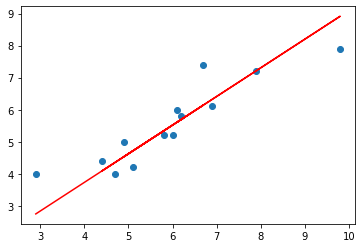

In [18]:
plt.plot(x,h_x,'r')
plt.scatter(x,y)

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [19]:
y_pred_GD = h_x
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.7481460845657725

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [20]:
max_iterations = 1000
iteration = 0
iteration_arr = []
theta_0 = 0
theta_1 = 0
learning_rate = 0.01
j = []
while (len(j)<2) or (iteration < max_iterations and j[-2]-j[-1] > 0.0001) :
  h_x = theta_0 + theta_1 * x
  error_vector = (h_x-y)
  j = j + [np.dot(error_vector,error_vector)/(2*len(y))]
  d_theta_0 = np.sum(error_vector)/len(y)
  d_theta_1 = np.sum(error_vector*x)/len(y)
  gradient_vector = np.array([ [d_theta_0],[d_theta_1] ])
  theta_0_new = theta_0 - learning_rate*d_theta_0
  theta_1_new = theta_1 - learning_rate*d_theta_1
  theta_0 = theta_0_new
  theta_1 = theta_1_new
  iteration_arr = iteration_arr + [iteration]
  print("**************Iteration ",iteration,"**************")
  print("h(x) : ",h_x)
  print("Error Vector : \n",error_vector)
  print("j = ",j[-1])
  print("Gradient Vector = ",gradient_vector)
  print("Gradient Vector Norm = ",np.linalg.norm(gradient_vector))
  print("theta_0_new  = ",theta_0_new)
  print("theta_1_new = ",theta_1_new)
  iteration += 1

**************Iteration  0 **************
h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error Vector : 
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j =  16.305384479692318
Gradient Vector =  [[ -5.56923074]
 [-35.04384604]]
Gradient Vector Norm =  35.483622652335995
theta_0_new  =  0.0556923073976923
theta_1_new =  0.35043846043215376
**************Iteration  1 **************
h(x) :  [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
Error Vector : 
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]
j =  6.175608808043304
Gradient Vector =  [[ -3.42708175]
 [-21.33845263]]
Gradient Vector Norm =  21.611905283072655
theta_0_new  =  0.08996312489803082
theta_1_new =  0.

### Plot loss vs. iterations

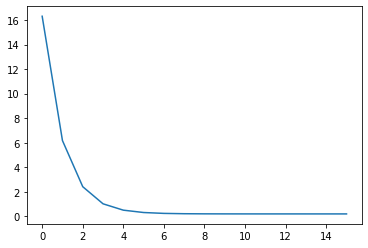

In [21]:
plt.plot(iteration_arr,j)
plt.show()

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [22]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [23]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [24]:
x1 = np.array(data2[:,0])
x2 = np.array(data2[:,1])
x3 = np.array(data2[:,2])
y = np.array(data2[:,3])

In [25]:
print("x1 : \n",x1)
print("x2 : \n",x2)
print("x3 : \n",x3)
print("y : \n",y)

x1 : 
 [73. 93. 89. 96. 73. 53. 69. 47. 87. 79. 69. 70. 93. 79. 70. 93. 78. 81.
 88. 78. 82. 86. 78. 76. 96.]
x2 : 
 [80. 88. 91. 98. 66. 46. 74. 56. 79. 70. 70. 65. 95. 80. 73. 89. 75. 90.
 92. 83. 86. 82. 83. 83. 93.]
x3 : 
 [ 75.  93.  90. 100.  70.  55.  77.  60.  90.  88.  73.  74.  91.  73.
  78.  96.  68.  93.  86.  77.  90.  89.  85.  71.  95.]
y : 
 [152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]


### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [26]:
max_iterations = 2000
iteration = 0
iteration_arr = []
theta = np.array([0,0,0,0])
learning_rate = 0.0001
j = []

while (len(j)<2) or (iteration < max_iterations and j[-2]-j[-1] > 0.0001) :
  h_x = theta[0] + theta[1]*x1 + theta[2]*x2 + theta[3]*x3
  error_vector = h_x-y
  j = j + [np.dot(error_vector,error_vector)/(2*len(y))]
  d_theta = np.array([np.sum(error_vector)/len(y),np.sum(error_vector*x1)/len(y),np.sum(error_vector*x2)/len(y),np.sum(error_vector*x3)/len(y)])
  gradient_vector = np.array([ d_theta[0],d_theta[1],d_theta[2],d_theta[3] ])
  theta_new = np.array([ theta[0] - learning_rate*d_theta[0] , theta[1] - learning_rate*d_theta[1] , theta[2] - learning_rate*d_theta[2], theta[3] - learning_rate*d_theta[3] ])
  theta = np.array([ theta_new[0],theta_new[1],theta_new[2],theta_new[3] ])
  iteration_arr = iteration_arr + [iteration]
  print("**************Iteration ",iteration,"**************")
  print("h(x) : ",h_x)
  print("Error Vector : \n",error_vector)
  print("j = ",j[iteration])
  print("Gradient Vector = ",gradient_vector)
  print("Gradient Vector Norm = ",np.linalg.norm(gradient_vector))
  print("theta_new  = \n",theta)

  iteration += 1


Streaming output truncated to the last 5000 lines.
theta_new  = 
 [0.002695   0.43902718 0.51737787 1.05901687]
**************Iteration  1028 **************
h(x) :  [152.86817447 184.85004481 181.46901907 198.75402318 140.32979992
 105.31644576 150.12583227 113.15114574 174.38243026 164.09577823
 143.82025329 142.731408   186.35365615 153.38430382 151.10649845
 188.5444733  145.06330291 180.61647436 177.31130226 158.73347774
 175.80893944 174.43651982 167.20561273 151.50132213 190.87204945]
Error Vector : 
 [ 0.86817447 -0.14995519  1.46901907  2.75402318 -1.67020008  4.31644576
  1.12583227 -1.84885426 -0.61756974  0.09577823  2.82025329  1.731408
  2.35365615  1.38430382  3.10649845 -3.4555267  -1.93669709 -2.38352564
  0.31130226 -0.26652226 -1.19106056 -0.56348018 -7.79438727  2.50132213
 -1.12795055]
j =  3.132649858087496
Gradient Vector =  [ 0.0732915   1.05498712  0.13081222 -1.15401278]
Gradient Vector Norm =  1.5707408446175024
theta_new  = 
 [0.00268768 0.43892168 0.51736479

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [29]:
print("h(x) = \n",h_x)

h(x) = 
 [152.857033   184.78631462 181.42602175 198.78471053 140.20423427
 105.33668559 150.27754058 113.44529589 174.405438   164.28333668
 143.87175323 142.78940589 186.22898549 153.16598008 151.25988859
 188.55830745 144.74549705 180.85967613 177.18785475 158.64234475
 175.95241063 174.45543767 167.32452873 151.30420906 190.77747634]


### Plot loss vs. iterations

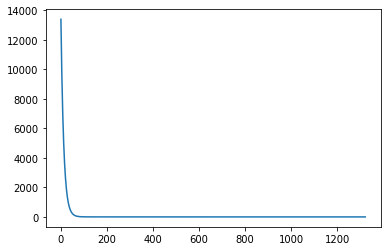

In [30]:
plt.plot(iteration_arr,j)
plt.show()

#### Use R2 score to evaluate LR equation output

In [32]:
y_pred_GD_Multi = h_x 
r2_score(y,y_pred_GD_Multi)

0.9888814345699838